# Анализ лога после выполнения скрипта

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

# from malware_src.database import DBLog
from malware_src.visualization import plot_roc_curve
from detector import DEFAULT_CSVLOG_PATH

In [2]:
# db_path = 'storage/log.db'
# db_log = DBLog(db_path)

In [3]:
scores = []
true_values = []
with open(DEFAULT_CSVLOG_PATH, 'r') as log:
    for n, line in enumerate(log):
        # Пропуск строки с названиями столбцов
        if n == 0:
            continue
        log_line = line.split(';')
        scores.append(float(log_line[0]))
        true_values.append(int(log_line[1]))

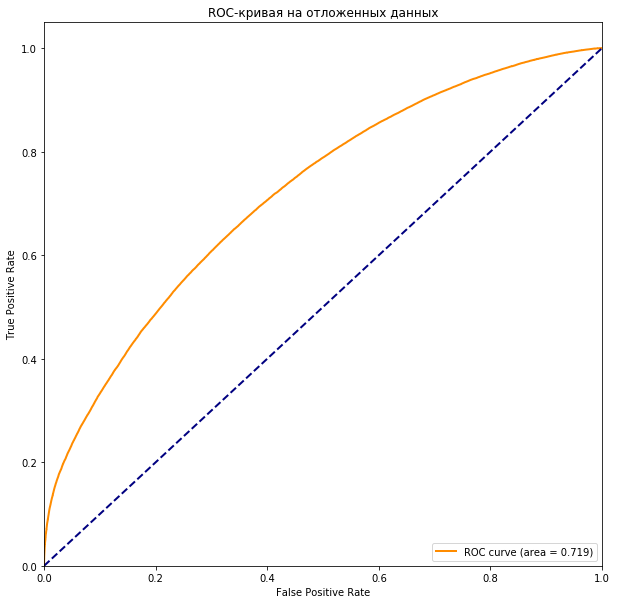

In [4]:
plt.figure(figsize=(10,10))
plot_roc_curve(true_values,
            scores,
            'ROC-кривая на отложенных данных',
            p_label=1)

## Вывод

ROC-кривая хорошо показывает эффективность бинарных классикаторов. Она строится для всех возможных порогов, при которых мы будет относить объект к одному из двух классов. В нашей задаче, выбор порога - это компромисс между точностью правильно классифицируемого вредоносного файла(TPR) и неверно классифицируемого безопасного файла как угрозу(FPR). Смотря на график выше, можно легко оценить поведение модели для разных порогов срабатывания и выбрать требуемый. 